Questions:

- Which model has higher f1 in microavg?
- Which model has higher weighted precision?
- Which model has higher precision by class?

In [227]:
import pandas as pd
import numpy as np
import glob, os

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [200]:
list_path =['./models_out/']

all_files = [glob.glob(os.path.join(path, 'sweeps_*.csv')) for path in list_path]
             
df_from_each_file = (pd.read_csv(file) for list_files in all_files for file in list_files )

df = pd.concat(df_from_each_file, ignore_index=True)


In [234]:
df.head(5)

,Unnamed: 0,model_type,model,sweeps_market_variables,sweep_news_agg,sweep_buy_sell,before_data,sweep_grid,best_score,best_params,f1_microavg,precision_weighted,precision_EUR_down,precision_EUR_same,precision_EUR_up,support_EUR_down,support_EUR_same,support_EUR_up,clf_report,elapsed_time
0,0,clf,kn,basic,ALL_NO_1_1_1,0_60,included,basic,0.51,{'n_neighbors': 161},0.53,0.88,0.05,0.96,0.11,32.0,1178.0,82.0,"{'0': {'precision': 0.05144694533762058, 'reca...",1.86
1,1,clf,svc-rbf,basic,ALL_NO_1_1_1,0_60,included,basic,0.50,"{'C': 1, 'gamma': 1}",0.51,1.00,0.00,1.00,0.00,0.0,1292.0,0.0,"{'0': {'precision': 0.0, 'recall': 0.0, 'f1-sc...",5.56
2,2,clf,dtree,basic,ALL_NO_1_1_1,0_60,included,basic,0.51,"{'max_depth': 7, 'min_samples_leaf': 100}",0.51,0.63,0.26,0.80,0.15,244.0,908.0,140.0,"{'0': {'precision': 0.2572347266881029, 'recal...",0.26
3,3,clf,rforest,basic,ALL_NO_1_1_1,0_60,included,basic,0.52,"{'max_depth': 7, 'min_samples_leaf': 10, 'n_es...",0.53,0.80,0.19,0.91,0.08,114.0,1094.0,84.0,"{'0': {'precision': 0.1864951768488746, 'recal...",12.90
4,4,clf,xgb,basic,ALL_NO_1_1_1,0_60,included,basic,0.52,{'n_estimators': 50},0.53,0.73,0.21,0.88,0.14,138.0,1024.0,130.0,"{'0': {'precision': 0.21221864951768488, 'reca...",0.41


In [213]:
df_data = pd.read_csv('./models_out/ALL_NO_1_1_1-basic-included-0_60-basic.csv')

In [236]:
df_data.head(5)

,Unnamed: 0,datetime,new_id,forecast_error_diff_deviation,forecast_error_diff_outlier_class,previous_error_diff_deviation,previous_error_diff_outlier_class,fe_accurate,fe_better,fe_worse,pe_accurate,pe_better,pe_worse,High,Low,Medium,year,week,weekday,num_news,volatility_60_0_before,pips_agg_60_0_before,pips_agg_0_60_after,direction_agg_0_60_after
0,0,2007-01-08 15:00:00,12,1.0,0,0.0,0,0,1,0,1,0,0,0,1,0,2007,2,0,1,14,4,-1,1
1,1,2007-01-09 10:00:00,37,0.0,0,0.0,0,1,0,0,1,0,0,0,1,0,2007,2,1,1,20,-3,-3,1
2,2,2007-01-10 08:30:00,68,1.0,0,0.0,0,0,1,0,1,0,0,1,0,0,2007,2,2,1,22,-13,-8,1
3,3,2007-01-10 10:00:00,31,1.0,0,0.0,0,0,0,1,0,1,0,0,1,0,2007,2,2,1,24,-15,-21,0
4,4,2007-01-10 10:30:00,18,-3.5,0,0.0,0,1,0,0,1,0,0,0,1,0,2007,2,2,1,46,-37,13,2


In [240]:
clf_report = classification_report(y_test, y_predict, output_dict=True)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [241]:
clf_report

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 311},
 '1': {'precision': 0.5092879256965944,
  'recall': 1.0,
  'f1-score': 0.6748717948717948,
  'support': 658},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 323},
 'micro avg': {'precision': 0.5092879256965944,
  'recall': 0.5092879256965944,
  'f1-score': 0.5092879256965944,
  'support': 1292},
 'macro avg': {'precision': 0.1697626418988648,
  'recall': 0.3333333333333333,
  'f1-score': 0.22495726495726495,
  'support': 1292},
 'weighted avg': {'precision': 0.2593741912603399,
  'recall': 0.5092879256965944,
  'f1-score': 0.34370405652139396,
  'support': 1292}}

How the 60_240 models behave?

In [210]:
list(df[(df['sweep_buy_sell']=='0_60') & (df['model'] == 'svc-rbf')].clf_report)[0]

"{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '1': {'precision': 1.0, 'recall': 0.5092879256965944, 'f1-score': 0.6748717948717948, 'support': 1292}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'micro avg': {'precision': 0.5092879256965944, 'recall': 0.5092879256965944, 'f1-score': 0.5092879256965944, 'support': 1292}, 'macro avg': {'precision': 0.3333333333333333, 'recall': 0.1697626418988648, 'f1-score': 0.22495726495726495, 'support': 1292}, 'weighted avg': {'precision': 1.0, 'recall': 0.5092879256965944, 'f1-score': 0.6748717948717948, 'support': 1292}}"

In [96]:
df[df['sweep_buy_sell']=='0_60'].sort_values(by='accuracy_test', ascending=False)[0:5]

,Unnamed: 0,model_type,model,sweeps_market_variables,sweep_news_agg,sweep_buy_sell,before_data,sweep_grid,best_score,best_params,accuracy_test,accuracy_per_class,ocurrences_per_class,total_ocurrences,elapsed_time
128,6,clf,ada,all,ALL_YES_3_2_1,0_60,included,basic,0.54,{'n_estimators': 50},0.54,"[17.77777777777778, 89.171974522293, 14.479638...","[225, 471, 221]",917,0.36
126,4,clf,xgb,all,ALL_YES_3_2_1,0_60,included,basic,0.55,{'n_estimators': 10},0.54,"[10.666666666666666, 93.84288747346072, 11.764...","[225, 471, 221]",917,0.74
52,4,clf,rforest,all,ALL_NO_3_2_1,0_60,included,basic,0.52,"{'max_depth': 6, 'min_samples_leaf': 30, 'n_es...",0.54,"[18.006430868167204, 93.31306990881458, 8.3591...","[311, 658, 323]",1292,10.54
121,6,clf,ada,basic,ALL_YES_3_2_1,0_60,included,basic,0.54,{'n_estimators': 50},0.54,"[17.77777777777778, 89.171974522293, 14.479638...","[225, 471, 221]",917,0.41
119,4,clf,xgb,basic,ALL_YES_3_2_1,0_60,included,basic,0.55,{'n_estimators': 10},0.54,"[10.666666666666666, 93.84288747346072, 11.764...","[225, 471, 221]",917,0.68


In [110]:
x = '[3,4,1]'
x[1:-1].split(',')

'3,4,1'

In [125]:
df['accuracy_per_class'] = df['accuracy_per_class'].apply(lambda x: x[1:-1].split(','))
df['USD_increases'] = df['accuracy_per_class'].apply(lambda x: x[0])
df['no_impact'] = df['accuracy_per_class'].apply(lambda x: x[1])
df['USD_decreases'] = df['accuracy_per_class'].apply(lambda x: x[2])

In [126]:
df.head(2)

,Unnamed: 0,model_type,model,sweeps_market_variables,sweep_news_agg,sweep_buy_sell,before_data,sweep_grid,best_score,best_params,accuracy_test,accuracy_per_class,ocurrences_per_class,total_ocurrences,elapsed_time,USD_increases,no_impact,USD_decreases
0,0,clf,kn,basic,ALL_NO_1_1_1,0_60,included,basic,0.5,{'n_neighbors': 81},0.53,"[9.32475884244373, 93.61702127659575, 12.383...","[311, 658, 323]",1292,0.61,9.32475884244373,93.61702127659575,12.38390092879257
1,1,clf,svc-rbf,basic,ALL_NO_1_1_1,0_60,included,basic,0.5,"{'C': 1, 'gamma': 1}",0.51,"[0.0, 100.0, 0.0]","[311, 658, 323]",1292,5.68,0.0,100.0,0.0


Which model has a higher precision estimating USD_decreases?

In [132]:
df.dtypes

Unnamed: 0                   int64
model_type                  object
model                       object
sweeps_market_variables     object
sweep_news_agg              object
sweep_buy_sell              object
before_data                 object
sweep_grid                  object
best_score                 float64
best_params                 object
accuracy_test              float64
accuracy_per_class          object
ocurrences_per_class        object
total_ocurrences             int64
elapsed_time               float64
USD_increases               object
no_impact                   object
USD_decreases               object
dtype: object

In [133]:
df['USD_increases'] = df['USD_increases'].astype('float')
df['no_impact'] = df['no_impact'].astype('float')
df['USD_decreases'] = df['USD_decreases'].astype('float')

In [134]:
df.sort_values(by='USD_decreases', ascending=False)[0:1]

,Unnamed: 0,model_type,model,sweeps_market_variables,sweep_news_agg,sweep_buy_sell,before_data,sweep_grid,best_score,best_params,accuracy_test,accuracy_per_class,ocurrences_per_class,total_ocurrences,elapsed_time,USD_increases,no_impact,USD_decreases
610,2,clf,dtree,all,High_YES_1_1_1,30_60,included,basic,0.68,"{'max_depth': 2, 'min_samples_leaf': 200}",0.68,"[75.0, 62.96296296296296, 69.36936936936937]","[116, 162, 111]",389,0.09,75.0,62.962963,69.369369


In [135]:
df.sort_values(by='no_impact', ascending=False)[0:1]

,Unnamed: 0,model_type,model,sweeps_market_variables,sweep_news_agg,sweep_buy_sell,before_data,sweep_grid,best_score,best_params,accuracy_test,accuracy_per_class,ocurrences_per_class,total_ocurrences,elapsed_time,USD_increases,no_impact,USD_decreases
1377,1,clf,svc-rbf,all,ALL_NO_3_2_1,60_180,included,basic,0.5,"{'C': 1, 'gamma': 1}",0.48,"[0.0, 100.0, 0.0]","[316, 624, 352]",1292,7.2,0.0,100.0,0.0


In [136]:
df.sort_values(by='USD_increases', ascending=False)[0:1]

,Unnamed: 0,model_type,model,sweeps_market_variables,sweep_news_agg,sweep_buy_sell,before_data,sweep_grid,best_score,best_params,accuracy_test,accuracy_per_class,ocurrences_per_class,total_ocurrences,elapsed_time,USD_increases,no_impact,USD_decreases
1006,2,clf,svc-poly,all,ALL_NO_1_1_1,60_120,included,basic,0.29,{},0.26,"[100.0, 0.0, 0.0]","[332, 618, 342]",1292,0.23,100.0,0.0,0.0


Let´s review the accuracy of knn models

In [175]:
df = pd.read_csv('./models_out/ALL_NO_1_1_1-all-included-0_60-basic.csv')

In [176]:
df.columns

Index(['Unnamed: 0', 'datetime', 'new_id', 'forecast_error_diff_deviation', 'forecast_error_diff_outlier_class', 'previous_error_diff_deviation', 'previous_error_diff_outlier_class', 'fe_accurate', 'fe_better', 'fe_worse', 'pe_accurate', 'pe_better', 'pe_worse', 'High', 'Low', 'Medium', 'year', 'week', 'weekday', 'num_news', 'volatility_60_0_before', 'pips_agg_60_0_before', 'pips_agg_0_60_after', 'direction_agg_0_60_after'], dtype='object')

In [177]:
df.head(2)

,Unnamed: 0,datetime,new_id,forecast_error_diff_deviation,forecast_error_diff_outlier_class,previous_error_diff_deviation,previous_error_diff_outlier_class,fe_accurate,fe_better,fe_worse,pe_accurate,pe_better,pe_worse,High,Low,Medium,year,week,weekday,num_news,volatility_60_0_before,pips_agg_60_0_before,pips_agg_0_60_after,direction_agg_0_60_after
0,0,2007-01-08 15:00:00,12,1.0,0,0.0,0,0,1,0,1,0,0,0,1,0,2007,2,0,1,14,4,-1,1
1,1,2007-01-09 10:00:00,37,0.0,0,0.0,0,1,0,0,1,0,0,0,1,0,2007,2,1,1,20,-3,-3,1


In [163]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [178]:
X = df[df.columns[2:-2]].values
y = df[df.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
 df[df.columns[2:-2]].head(2)

,new_id,forecast_error_diff_deviation,forecast_error_diff_outlier_class,previous_error_diff_deviation,previous_error_diff_outlier_class,fe_accurate,fe_better,fe_worse,pe_accurate,pe_better,pe_worse,High,Low,Medium,year,week,weekday,num_news,volatility_60_0_before,pips_agg_60_0_before
0,12,1.0,0,0.0,0,0,1,0,1,0,0,0,1,0,2007,2,0,1,14,4
1,37,0.0,0,0.0,0,1,0,0,1,0,0,0,1,0,2007,2,1,1,20,-3


In [180]:
clf_kn = GridSearchCV(KNeighborsClassifier(n_neighbors=1),
                          param_grid={"n_neighbors": range(1, 100, 10)},
                          scoring="accuracy",
                          cv=5)
clf_kn.fit(X_train, y_train)
y_predict = clf_kn.predict(X_test)

In [181]:
print(format(accuracy_score(y_predict, y_test), '.2f'))

0.53


In [198]:
classification_report(y_test, clf_kn.predict(X_test), output_dict=True)

{'0': {'precision': 0.3625,
  'recall': 0.0932475884244373,
  'f1-score': 0.1483375959079284,
  'support': 311},
 '1': {'precision': 0.545615589016829,
  'recall': 0.9361702127659575,
  'f1-score': 0.6894236149972021,
  'support': 658},
 '2': {'precision': 0.4819277108433735,
  'recall': 0.1238390092879257,
  'f1-score': 0.19704433497536947,
  'support': 323},
 'micro avg': {'precision': 0.5301857585139319,
  'recall': 0.5301857585139319,
  'f1-score': 0.5301857585139319,
  'support': 1292},
 'macro avg': {'precision': 0.46334776662006755,
  'recall': 0.38441893682610684,
  'f1-score': 0.34493518196016665,
  'support': 1292},
 'weighted avg': {'precision': 0.4856154862039343,
  'recall': 0.5301857585139319,
  'f1-score': 0.4360828569601928,
  'support': 1292}}

In [183]:
clf_kn.best_params_

{'n_neighbors': 81}

In [103]:
y_predict_prob = clf_kn.predict_proba(X_test)

In [104]:
y_predict_prob[0:4]

array([[0.23076923, 0.24175824, 0.18681319, 0.17582418, 0.16483516],
       [0.02197802, 0.30769231, 0.28571429, 0.31868132, 0.06593407],
       [0.12087912, 0.24175824, 0.37362637, 0.18681319, 0.07692308],
       [0.0989011 , 0.21978022, 0.34065934, 0.25274725, 0.08791209]])

In [107]:
confusion_matrix(y_test, clf_kn.predict(X_test))

array([[ 18,  52, 109,  26,   8],
       [  7,  53, 139,  35,  11],
       [  9,  59, 208,  52,  13],
       [  9,  55, 159,  47,  15],
       [ 18,  43, 104,  28,  15]])

In [116]:
confusion_matrix = pd.crosstab(y_test, clf_kn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

In [136]:
for i in [-2,-1,0,1,2]:
    print(confusion_matrix[i][i])

18
53
208
47
15


In [132]:
confusion_matrix[-2][-2]

18

In [137]:
confusion_matrix['All'][0]

NameError: name 'confusion_matrix' is not defined

In [108]:
pd.crosstab(y_test, clf_kn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-2,-1,0,1,2,All
True,,,,,,
-2,18,52,109,26,8,213
-1,7,53,139,35,11,245
0,9,59,208,52,13,341
1,9,55,159,47,15,285
2,18,43,104,28,15,208
All,61,262,719,188,62,1292


In [109]:
len(y_test)

1292

In [111]:
(213 + 208)*100 / 1292

32.585139318885446

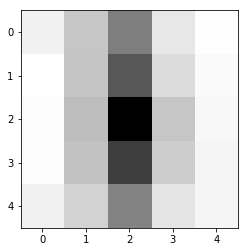

In [115]:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, clf_kn.predict(X_test))
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()